# **Implementación de Newton Raphson para 2 dimensiones**
**Facultad de ingeniería**

Departamento de Ingeniería de Sistemas y computación

Universidad de los Andes

**ISIS-3302:** Modelado, Simulación y Optimización


**Nombres de los integrantes**


1.   Daniel Felipe Diaz Moreno
2.   Sara Sofía Cárdenas Rodríguez

**Número del grupo**

15


Importación de librerias

In [1]:
!pip install sympy
from sympy import symbols, Eq, latex, diff

# Para mostrar ecuaciones en formato LaTeX
from IPython.display import display, Math

# Para mostrar gráficas
import matplotlib.pyplot as plt
import numpy as np

# Para obtener números aleatorios para RGB
from random import randint


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
def f(x):
    return 3*x**3 -10*x**2 -56*x + 50

x, y = symbols('x y')
display(Math(latex(Eq(y, f(x)))))

<IPython.core.display.Math object>

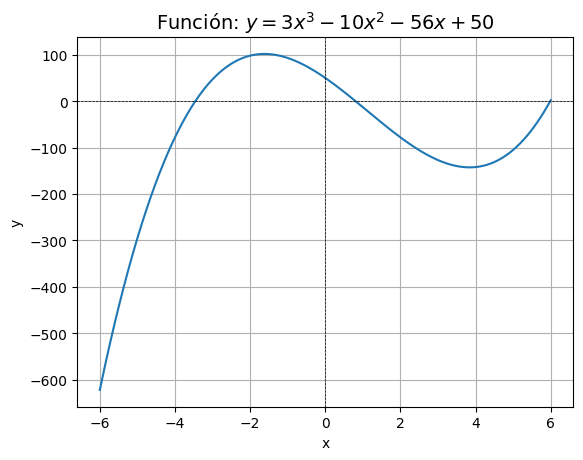

In [3]:

def graficarFuncionYPuntos(funcion, valoresDeX = []):
    valoresEnX = np.linspace(-6, 6, 400)
    valoresEnY = np.array([f(x) for x in valoresEnX])

    plt.plot(valoresEnX, valoresEnY)
    plt.title(f'Función: ${latex(Eq(y, f(x)))}$', fontsize=14)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')
    plt.grid()

    for i, valorDeX in enumerate(valoresDeX):
        if i == len(valoresDeX) - 1:
            color = (1,0,0)
        else:
            color = (randint(0, 255) / 255, randint(0, 255) / 255, randint(0, 255) / 255)
        valorDeY = funcion(valorDeX)
        plt.plot(valorDeX, valorDeY, 'o', color=color, label=f'Punto ({valorDeX:.2f}, {valorDeY:.2f})')

    if valoresDeX:
        plt.legend()
    plt.show()

graficarFuncionYPuntos(f)

In [4]:
def derivada(f, valorDeX):
    return diff(f).subs(x, valorDeX)

def segundaDerivada(f, valorDeX):
    return diff(diff(f)).subs(x, valorDeX)

def newtonRaphson(f, x_0, a):
    i = 0
    valoresX = [x_0]
    convergencia=0.001
    while abs(derivada(f, valoresX[i])) > convergencia:
        valoresX.append(valoresX[i] - a * (derivada(f, valoresX[i]) / segundaDerivada(f, valoresX[i])))
        i += 1
    x_gorro = valoresX[-1]
    return x_gorro, valoresX

In [5]:
xEncontrado, valoresX = newtonRaphson(f(x), 0, 1)
puntoInflexion = (xEncontrado, f(xEncontrado))
print(f'El punto de inflexión es: {puntoInflexion}')
print(f'El punto de inflexión es aproximadamente: {puntoInflexion[0]:.2f}, {puntoInflexion[1]:.2f}')

El punto de inflexión es: (-8196330378437369/5060691794327840, 13183844744583040195385245796465617470941726392773/129607360540923102220477092590536078996066304000)
El punto de inflexión es aproximadamente: -1.62, 101.72


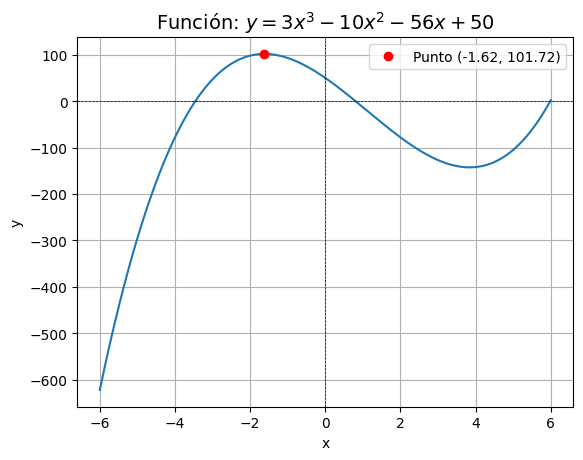

In [6]:

graficarFuncionYPuntos(f, [xEncontrado])

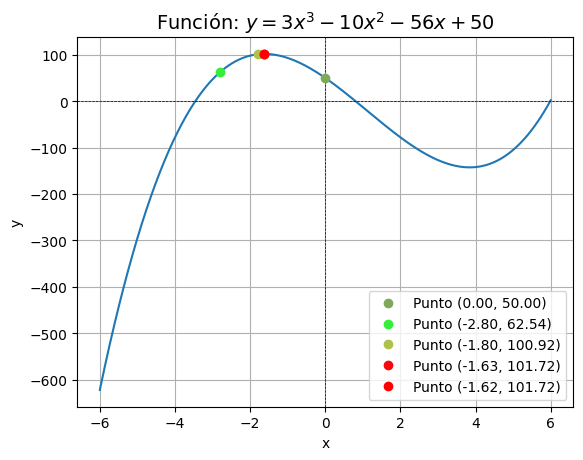

In [7]:
graficarFuncionYPuntos(f, valoresX)

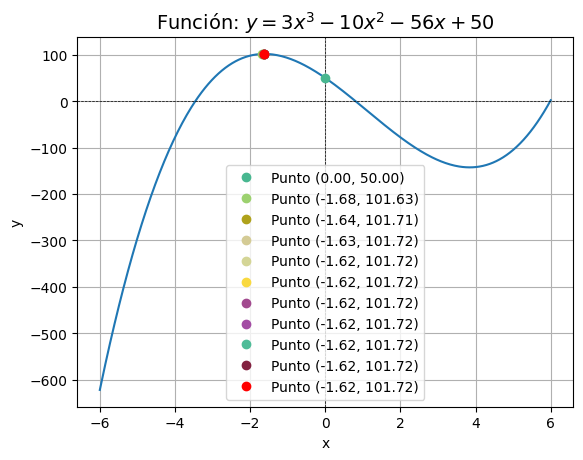

In [8]:
xEncontrado, valoresX = newtonRaphson(f(x), 0, 0.6)
graficarFuncionYPuntos(f, valoresX)

En ambos casos, el algoritmo alcanzó el mismo punto de inflexión. Sin embargo, al utilizar un valor de alpha de 0.6, el algoritmo realizó saltos más cortos, lo que le permitió acercarse rápidamente a un punto cercano al óptimo. No obstante, esto implicó realizar muchos saltos pequeños para llegar a un punto en el que la evaluación de la derivada fuera inferior al umbral de convergencia. Es importante destacar que, aunque en el gráfico parece que el algoritmo realizó múltiples iteraciones que llevaron al mismo punto, en realidad se trata de puntos distintos. Esta similitud se debe a que todos los puntos se muestran con solo dos decimales.